In [75]:
#%matplotlib inline
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
print("DONE")

DONE


In [76]:
from main_classes.voltage_maps import VoltageMap
from main_classes.epsilon_cover import build_epsilon_covers, estimate_densities
from utilities.generate_toy_data import non_uniform_1d_experiment
from definitions import CONFIG_VOLTAGE_MAPS_PATH
from config.yaml_functions import yaml_loader
print("DONE")

DONE


### Setup

In [77]:
lvl_of_interest = 9
num_data_samples = 20000
source_center = np.array([0.2]).reshape(-1, 1)
config = yaml_loader(CONFIG_VOLTAGE_MAPS_PATH)
print("DONE")

DONE


### Construct toy data

In [112]:
def data_distribution(start, stop, n):
    mu1 = 0.2
    mu2 = 0.9
    sigma1 = 0.01
    sigma2 = 0.2

    f = np.concatenate((np.random.normal(loc=mu1, scale=sigma1, size=int(0.3*n)),
                        np.random.normal(loc=mu2, scale=sigma2, size=int(0.3*n))))
    return f[(f >= start) & (f <= stop)]



data = data_distribution(0, 1, num_data_samples)
data = data.reshape(-1, 1)

source_center_index = 0
data = np.concatenate((source_center, data))
print("DONE")

DONE


In [113]:
x = np.linspace(0, 1, len(data))
print(x.shape)

(10184,)


In [114]:
data_plotting = data.flatten()
data_plotting.shape

(10184,)

<IPython.core.display.Javascript object>


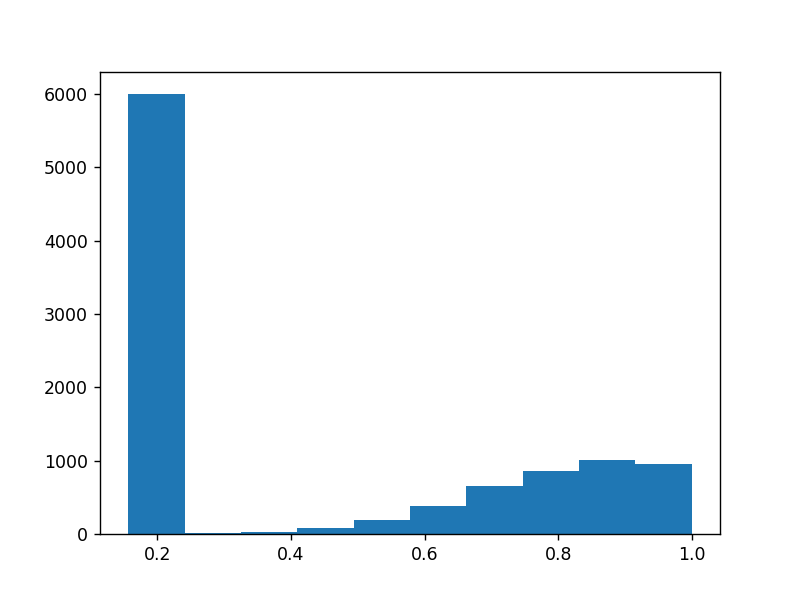

In [115]:
plt.figure()
plt.hist(data.flatten())
plt.show()

### Generate an epsilon cover

In [116]:
epsilon_cover = build_epsilon_covers(data)
epsilon_cover_lvl = epsilon_cover[lvl_of_interest]

number of processed points = 0
number of processed points = 10000


In [117]:
epsilon_cover_centers = epsilon_cover_lvl['centers']
densities = estimate_densities(epsilon_cover_centers, data)
epsilon_cover_lvl['densities'] = densities
print("DONE")

DONE


In [118]:
sort_indices = np.argsort(epsilon_cover_centers, axis=0).flatten()
densities = epsilon_cover_lvl['densities']
indices = epsilon_cover_lvl['indices']

epsilon_cover_centers = epsilon_cover_centers[sort_indices]
densities = densities[sort_indices]
indices = indices[sort_indices]
print("DONE")

DONE


### Voltage maps

#### Using region source with density scaling

In [119]:
voltage_map = VoltageMap(config, epsilon_cover_lvl, source_center_index, weight_to_ground=1.e-1, is_source_region=True)
voltage_map.trimmer()
voltage_map.construct_transition_matrix()
voltage_map.propagate_voltage()
print("Done")

propagating labels:   5%|██▉                                                       | 51/1000 [00:00<00:00, 6462.33it/s]

Done


In [120]:
voltage_region_source = voltage_map.get_voltage()
voltage_region_source = voltage_region_source[sort_indices]
print("DONE")

DONE


<IPython.core.display.Javascript object>


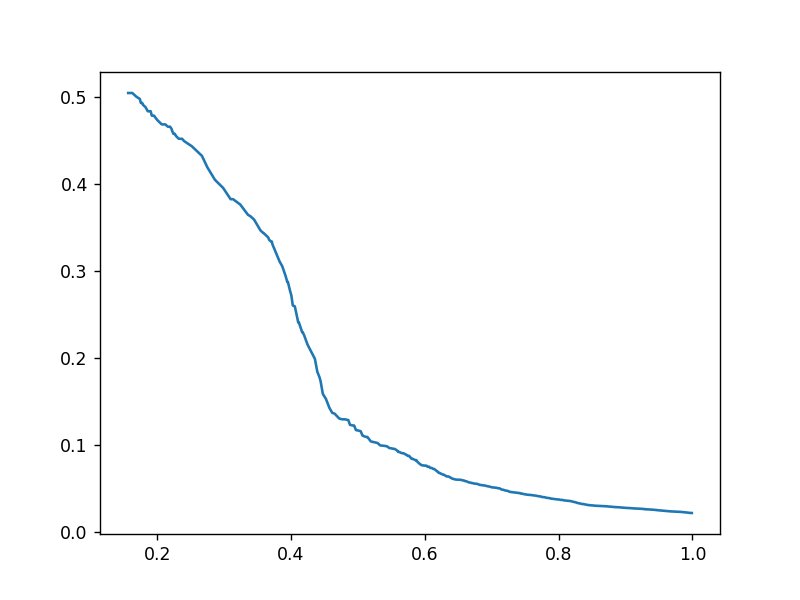

DONE


In [121]:
plt.figure()
plt.plot(data[indices], voltage_region_source)
plt.show()
print("DONE")

#### Using point source with density scaling

In [122]:
voltage_map = VoltageMap(config, epsilon_cover_lvl, source_center_index, weight_to_ground=0.09, is_source_region=False)
voltage_map.trimmer()
voltage_map.construct_transition_matrix()
voltage_map.propagate_voltage()
print("Done")

propagating labels:   1%|▍                                                          | 7/1000 [00:00<00:00, 2959.09it/s]

Done


In [123]:
voltage_point_source = voltage_map.get_voltage()
voltage_point_source = voltage_point_source[sort_indices]
print("DONE")

DONE


<IPython.core.display.Javascript object>


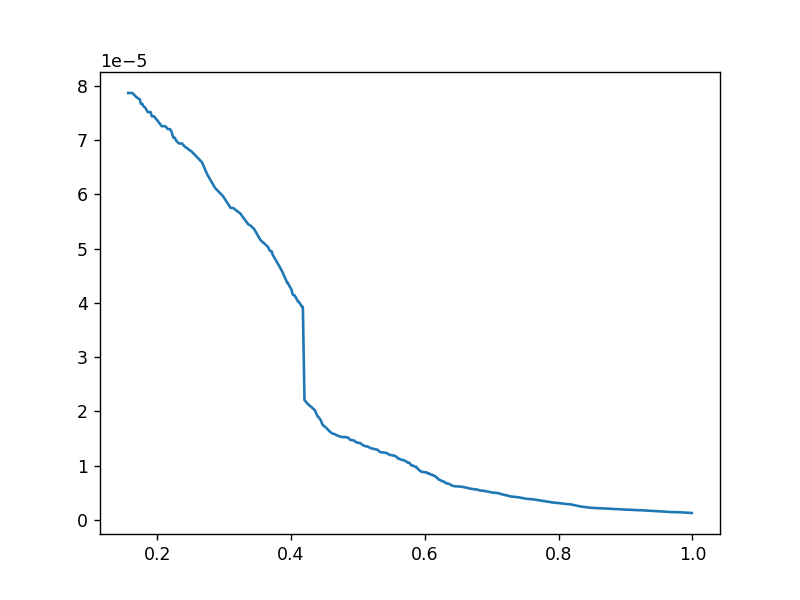

DONE


In [124]:
plt.figure()
plt.plot(data[indices], voltage_point_source)
plt.show()
print("DONE")

### Visualize

<IPython.core.display.Javascript object>


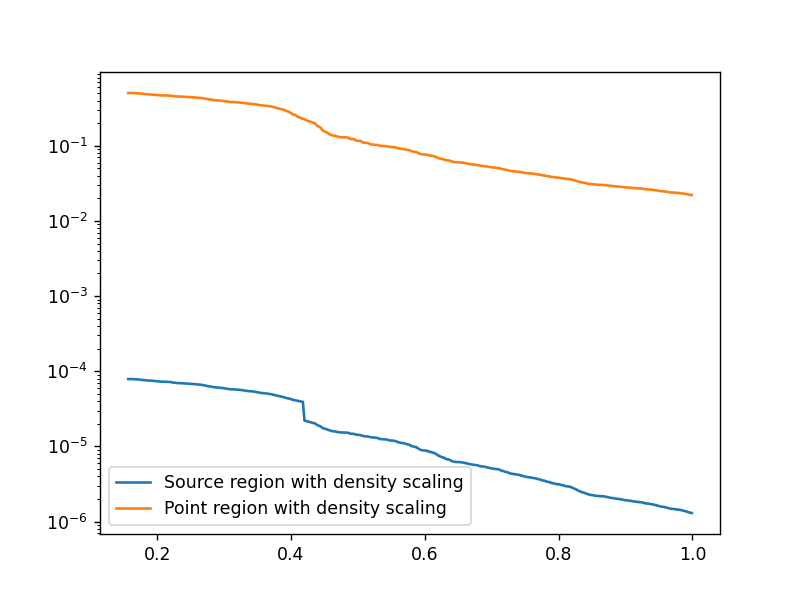

DONE


In [125]:
plt.figure()
plt.plot(data[indices], voltage_point_source, label='Source region with density scaling')
plt.plot(data[indices], voltage_region_source, label='Point region with density scaling')
plt.yscale('log')
plt.legend()
plt.show()
print("DONE")

In [126]:
### To get the same order of magnitude on the two plots, we multiply with a suitable factor
factor = max(voltage_region_source)/max(voltage_point_source)
voltage_point_source_scaled  = voltage_point_source*factor

In [127]:
factor

6423.395909247698

<IPython.core.display.Javascript object>


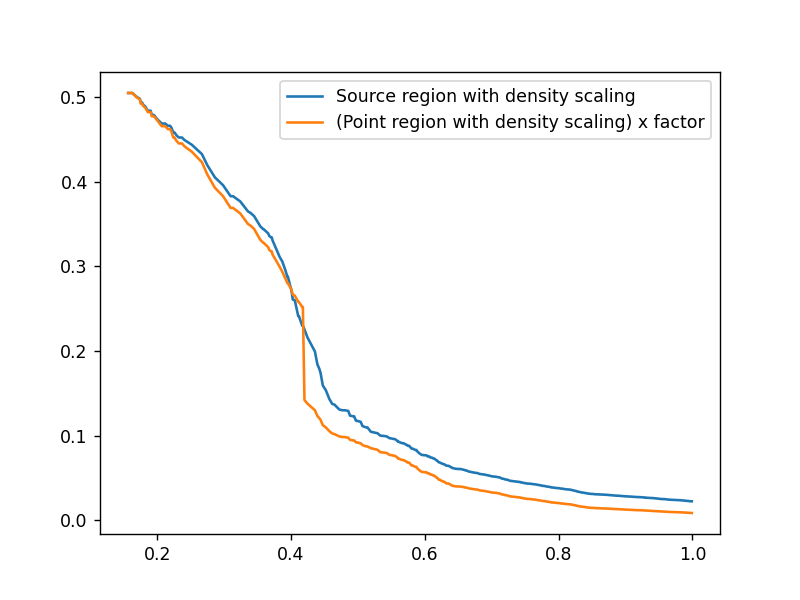

DONE


In [128]:
plt.figure()
plt.plot(data[indices], voltage_region_source, label='Source region with density scaling')
plt.plot(data[indices], voltage_point_source_scaled, label='(Point region with density scaling) x factor')
plt.legend()
plt.show()
print("DONE")